<img src="https://github.com/christopherhuntley/data5405/blob/main/img/Dolan.png?raw=true" width="180px" align="right">

# **Lesson 5: Iteration**
_Keeping things DRY with loops_

## **Learning Objectives**

### Theory / Be able to explain ...
- The elements and flow of iteration processes
- Variable updating and in-place update operators
- `while` loops and `for` loops
- The role of design patterns in software architecture
- The Accumulator design pattern

### Skills / Know how to  ...
- Use variable updating to capture dynamic data
- Implement iteration logic with `while` and `for` loops
- Break or short-circuit loop logic as needed
- Use accumulators to capture cumulative data

---

## **If You Can Count, Then You Can Iterate**

>"There are only two hard things in Computer Science: cache invalidation, naming things, and off-by-one errors." -- Phil Karlton

Counting is one of the first math skills we learn. By the age of 18 months, a child can usually carry out the basic steps of marking off the next item on a list. They might get confused by the sixth or seventh item -- perhaps counting the same item twice -- but **a toddler can usually count up to 5 items.** It's not like the process is that hard:

1. Choose an item from the pile.
2. Mark off the item by saying the next number in the sequence.
3. Place the item into another pile.
4. Repeat 1-3 until there are no items left in the original pile.

However, it is surprising how hard some novice programmers find it to **iterate** (mark off) items one at time. Given a list (or other sequence) of items to be processed exactly the same way, they will try to use what we call "copy / paste / edit" logic, modifying the code a little for the specifics of each item. Wow, what a complete waste of time. Instead, they should do exactly like the babies do:
1. Take an item (it) off the list.
2. Process it, taking note of any effects.
3. If needed again, add it to an out-list of processed items.
4. Repeat until the list is exhausted.

Besides being more efficient for the programmer, it is also less buggy. The logic in step 2 is always the same, no matter how many times we repeat the loop. Why make things more difficult by doing it a different way each time?

> **Heads Up** Step 2 may have *side effects* that affect data. There are two ways that can happen. Either **it alters the data values in place** (variable reassignment) or **it generates new values**, usually to be stored in a list or other collection. We'll see both in the long division example below.

**This lesson is about iteration, the last of the four fundamental elements of Structured Programming.** By the end of this lesson you will know the basics of all programming logic. Everything else is somewhat derivative, as Edsger Dijkstra proved so many years ago.

---
## **More than Just Counting: How about Long Division?**
While counting may be the first iterative process we learn as children, it is far from the last. Another is **long division**, which children used to master as a right of passage in primary school, but today is (sadly) not seen as an educational necessity. Instead, children are told to use a calculator. While somewhat practical in an age when everybody has phones in their pockets, children are being cheated out of an important lesson in algorithmic thinking needed for higher forms of math like algebra and calculus. The effects are obvious to those of us who teach quantitative sciences for a living. Many young adults today cannot reliably calculate an average of ten numbers, **even when armed with a calculator to do the arithmetic**. Instead they rely on tools like MS Excel that turn averaging into a feature instead of a process, which over time leads to a lack of intuitive understanding of important analytical concepts like centrality and variability. They see the world as static, with all the processing already done, all the data already processed, when real world data is anything but static.  And it all starts (or, more properly, ends for many people) with long division.

Now that we have established its importance, what exactly is long division? Long division is a standard manual method for dividing one number (the **dividend**) by another (the **divisor**). The result is called the **quotient**, which may include a **remainder** if the first number cannot be evenly divided by the second. Like counting, it involves repetition of a fixed set of steps (with examples shown for the first pass; you may also want to try this with pencil and paper):

1. Identify the `dividend` and the `divisor`. For our purposes the dividend is treated as a string of digits that we can "pull down" (or, as we programmers call it, "pop off") one at a time starting from the left hand side. Similarly, we will build up the quotient one digit at a time by comparing the divisor with digits from the dividend.
  * Set `dividend` = 1260257, `divisor` = 37, `quotient` = 0, `remainder` = 0.
2. Pull down a digit `d` from the dividend and add it to the `remainder`.
  * Set `remainder = 10 * 0 + d = 0 + 1 = 1`.
3. Calculate a digit `q` by evenly dividing the `remainder` by the `divisor`, ignoring the non-integer fraction left over. (In Python we use the `//` operator for this sort of integer division.)
  * Set `q = remainder // divisor = 1 // 37 = 0`; the first digit of the quotient is `0`.
4. Calculate the `product` of `q` and the `divisor`.
  * Set `product = q * divisor = 0`
5. Subtract the `product` from the `remainder` and append the digit `q` to the `quotient`.
  * The new `remainder` is (the previous) `remainder` - `product` or `1 - 0 = 1`.
  * The new `quotient` is calculated as `quotient * 10 + q = 0 * 10 + 0 = 0`.
6. Repeat steps 2-5 until no digits remain to pull down from the `dividend`.   

For those of you who like visuals, here is a useful animated GIF showing the rest of the process (after skipping the initial 0s in the quotient):

![animated gif](https://upload.wikimedia.org/wikipedia/commons/f/f2/LongDivisionAnimated.gif)

By <a href="//commons.wikimedia.org/wiki/User:Xanthoxyl" title="User:Xanthoxyl">Xanthoxyl</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=5818667">Link</a> .

That's a pretty complicated process, with at least six different variables to keep track of. Nonetheless a 9 year old can proudly show you if you forget how to do it.

We will, _of course_, implement all this in Python. But first, let's consider the computational requirements:
- **Pull down the next digit from the `dividend` in step 2.** We can easily do this by treating the dividend as a text string. However, we will consider a more advanced way in Lesson 8.
- **Calculate `q` and `product` in steps 3 and 4.** These are straightforward arithmetic (and can be folded into step 5 if we wanted to).
- **Update the `remainder` in place in steps 2 and 5.** This is what we call **variable updating**, which we will get to in a moment.
- **Repeat the process for each digit of the `dividend`.** This is iteration. We will spend most of our time here in this lesson.

### **Variable Updating**
Up to now whenever we have changed the value of a variable we have done it through variable (re-)assignment.
```python
x = 1
something_happens()
x = 2
```
**Variable updating deals with the case where the same variable is on both sides of the equal sign `=`.** The classic and simplest case is adding 1 to `x` (as in counting):
```python
x = x + 1
```
Since this is just a special case of variable assignment, the 3-step process we learned in Lesson 2 still applies:
1. Recall the variable `x`, which already exists (or else we get an error).
2. Evaluate the expression `x+1`, which adds 1 to the current value of `x` (but doesn't change `x` itself).
3. Assign `x` the value calculated in step 2.  

It makes sense, but only if you understand the order of things. The variable only has one value at a time, even though at first it looks like we are saying something sort of like `1 = 2`.

A couple remarks:
- **The variable `x` need not refer to numerical values.** We can do the same thing with strings, lists, or any other data type supported by Python. The steps are the same each time.   
- **We can subtract as easily as we can add.** In fact, any expression can be on the right side. It just has to include the variable from the left hand side of the `=`.

To improve execution efficiency and eliminate spelling errors, Python has built-in **update operators** (a.k.a. "augmented assignment statements") for certain special cases:
- `x += 1` is the same as `x = x + 1`  
- `x -= 1` is the same as `x = x - 1`  

You should get the general idea. Other update operators include `/=`, `*=`, `@=` (for matrix multiplication), and a few more obscure ones. In practice you will likely only encounter `+=` and `-=`.

### **Variable Updating in Long Division**
The long division process includes 3 variable updates:
- `remainder = remainder*10 + int(d)` (from step 2; recall that `d` was the next in a string of digits in the dividend)
- `remainder -= product` (from step 5; subtracts the product from the remainder)
- `quotient = quotient*10 + q` (also from step 5; appends the next digit to the quotient)

We'll see how this all works (below) for two different versions of the long division code.

### **Pulse Check ...**
Consider this snippet of code:
```python
x = 22
x *= 3
x += 15
x /= 3
x -= 4
```
**1. What is the final value of `x`?**

23.0

In [ ]:
#@title Check Your Answer

x = 22
x *= 3
x += 15
x /= 3
x -= 4
x        # note the data type change!

**2. Combine the four updating steps (above) into one statement (using just one update operator).** Hint: you may need to do a little middle school pre-algebra.

In [ ]:
# YOUR ANSWER HERE
x = ((22 * 3) + 15) / 3 - 4
x

In [ ]:
#@title  Check Your Answer

x = 22
# x = (((3x)+15)/3)-4 = (3x +15)/3 -4 = (x + 5) - 4 = x + 1
x += float(1)
x

---
## **`while` Loops**
If what we want to do is repeat a task an indefinite number of times, we can always use a `while` loop:
```python
while continuation_criterion:
    loop_body_block
else:
    else_block
```
Python will execute the code like so:

1. Evaluate the continuation criterion, which is always a boolean expression (evaluates to `True` or `False`) or equivalent (truthy via `bool()`).
2. If the continuation criterion evaluates to `True` then execute the loop body block and return to Step 1. Otherwise, execute the else block (if it exists).

A few notes:
- **The `else` clause is optional.** It's used in cases where we need to ensure that _something_ happens, even when the continuation criterion is `False`. *Only use the `else` clause when you need it.*
- Unless you know what you are doing, **make sure that the continuation criterion eventually evaluates to False.** That means that something has to happen inside the body of the loop to _cause_ the value of the continue expression to change. Otherwise the loop will continue forever.
- Most of the time you will need to **initialize a variable (i.e., assign it a value)** used in your continuation criterion so that it evaluates to `True` the first time though the loop. That same variable (usually what is called an _accumulator_) will likely need to be updated with each pass of the loop. Often we do that at the end of the loop body.
- **Just as with `if` statements, don't forget the colons.** They are needed by Python to know where the continuation criterion ends.
- **We can create infinite loops by short-circuiting the boolean expression** (e.g., `while True: ...`). Then it is up to the loop body to terminate the loop using a `break` statement, which works similarly to `return` (for functions) except for loops. **Anytime that Python encounters a `break` it terminates the enclosing loop.**
- We can short-circuit the loop body itself by using a `continue` statement to return to the top of the loop (Step 1) immediately, without executing the rest of the loop. This can make some things much, much faster.  

Here's an example that generates the square of every number from 1 to 20:

In [ ]:
i = 1            # initialize the counter variable
while i <= 20:   # stop when i > 20
    print(i * i) # output i squared
    i += 1       # update the counter; take this out to create an infinite loop

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


> ### **Warning About Infinite Loops**
> An unchecked infinite loop can crash your computer by using up CPU and memory resources. When running the offending code on your laptop, you may suddenly hear the fan going all out like a jet engine or your hard disk might crash (if your loop writes to disk).
>
> If that happens, you will need to **shut down the runtime** as soon as possible. How you do that depends on the runtime environment. In JupyterHub that means restarting the _kernel_. In Colab it's called restarting the _runtime_. Look for those options in the menus. In the Python interpreter (i.e., command line, without menus) a shudown can be done with Control-C from the keyboard. Why Control-C? Because that is how it has always been since we first started using keyboards with computers. (Unless you are using Windows(tm), where it's Shift-Control-C instead.)

### **Chained Assignment**
When initializing several variables at once it is sometimes convenient to use **chained assignment**:
```python
x = y = z = 1
```
The rightmost value is assigned to each of the variables to its left. In this case that means setting `x`, `y`, and `z` to 1.

### **Long Division with `while`**
We can implement long division with a `while` loop. Read the comments to understand how it works.

In [ ]:
def long_division(dividend, divisor):

  '''
  Divides the dividend by the divisor.

  - dividend: an integer number
  - divisor: an integer, usually smaller than the dividend

  Returns a dictionary {'quotient': ..., 'remainder: ...'}
  '''

  # Initialize variables
  remainder = quotient = 0 # required by the long division algorithm; note the use of chained assignment

  digits = str(dividend)   # convert dividend to a string of digit characters
  i = 0                    # our counter used to indicate the current digit; Python counts from 0, not 1

  while i < len(digits):   # len(digits) is the number of characters in the string

      remainder = remainder*10 + int(digits[i])     # pull down the i-th digit into the remainder
      q = remainder // divisor                      # determine the next digit of the quotient
      product = q * divisor                         # calculate the product, and then ...
      remainder -= product                          # subtract it from the remainder

      quotient = quotient*10 + q                    # add the next digit to the quotient
      i += 1                                        # update i to move to the next digit

  return {'quotient':quotient,'remainder':remainder}

In [ ]:
long_division(479, 7)

> **Tip:** Select and then mouse over `long_division` call in the cell above. Note that the doc-string (inside triple quotes) pops up to tell you what the function does.
>
> 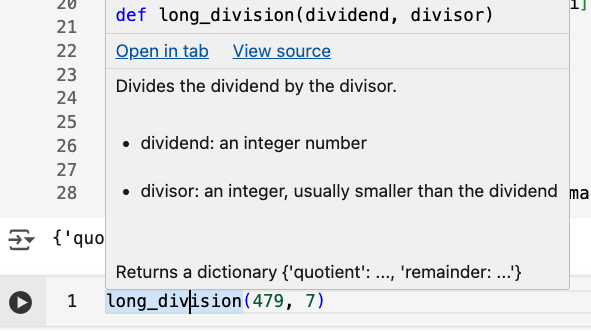

### **Pulse Check ...**
**1. What does the following code do?** Add a comment to each line and then a comment on the top of the code summarizing what it does.

In [ ]:
i = total = 0
while i <= 20:
    total += i
    i += 1

total

In [ ]:
#@title Check Your Answer

# Calculates the sume of the first 20 integers
i = total = 0    # Initialize counter i and accumulator total
while i <= 20:   # check to see if we're done
    total += i   # add the count to the accumulator
    i += 1       # update the count
total            # display the total

**2. How would you calculate the same result in one line without using a loop.** Hint: Gauss was a very smart and lazy child. Google it.

In [ ]:
# Your code here.

Total = 200 + 10

In [ ]:
#@title Check Your Answer

# Sum of integers up to N = N(N+1)/2
20*21/2

---
## **`for` Loops**
Though `while` loops can be very useful, they do come with a lot of ceremony around initializing variables, crafting the right boolean expression at the top of the loop, and updating variables at the bottom of the loop.

`for` loops are functionally equivalent to `while` loops but with all of the ceremony handled by Python behind the scenes:
```python
for i in sequence:
    do_something_with_i
else:
    handle_empty_sequence
```
Remarks:
- **The `sequence` is evaluated exactly once, before anything else.** It could be a string of characters, a list of items, or any number of other things that can be ordered (sorted) into a sequence.
- **Each time through the loop the "index" variable `i` is updated to the next item in the sequence.** It does to have to be an integer. If we have a list of fruits, then each `i` is a fruit. It also does not need to be called `i`. We could use any valid Python variable name.
- **The `else` clause, `continue`, and `break` apply here just like with `while` loops.** All are optional, of course. *Only use them when you need them.*  
- **There are other special forms of indexing that we will learn about in later lessons.** The vast majority of the time the index is just like we have it here.

Here is our "squares up to 20" code updated to use a `for` loop:

In [ ]:
for i in range(1,21):     # range(21) generates the sequence of numbers 1, 2, 3, ... 20
    print(i*i)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


While it is just two lines shorter than the `while` version, **this code is much easier to maintain**, with a lot less work on the part of the programmer.
### **Long Division with `for`**

In [ ]:
def long_division(dividend, divisor):

  '''
  Divides the dividend by the divisor.

  - dividend: an integer number
  - divisor: an integer, usually smaller than the dividend

  Returns a dictionary {'quotient': ..., 'remainder: ...'}
  '''

  # Initialize variables
  remainder = quotient = 0                # required by the long division algorithm

  for d in str(dividend):                 # for each digit of the dividend:
      remainder = remainder*10 + int(d)     # pull down the i-th digit into the remainder
      q = remainder // divisor              # determine the next digit of the quotient
      product = q * divisor                 # calculate the product, and then ...
      remainder -= product                  # subtract it from the remainder

      quotient = quotient*10 + q            # add the next digit to the quotient

  return {'quotient':quotient,'remainder':remainder}

In [ ]:
long_division(479, 7)

{'quotient': 68, 'remainder': 3}

Can you spot what changed from the `while` loop version?
- The conversion from an integer dividend to a string of digits is done with a single expression `str(dividend)`, without the need for initializing the `digits` variable.
- The digit `d` _is_ the next digit. We no longer need to do the bookkeeping with `i` to mark out the digits.
- There is no need to update anything from one pass to the next. The `for` loop does it for us. You'd have to do something special to force the loop to go on forever. Yay, no infinite loops!

Perhaps this seems like nothing special but it really is easier to maintain this code. Instead of so much ceremonial code to implement the loop controls (continuation condition, accumulator variable, etc.), we now can focus pretty much entirely on the body of the loop, which is where the real work happens. `for` loops are the "lazy, but smart" version of `while` loops. When they are applicable, use them (unless there is an "even lazier and smarter" way with pandas or numpy).

### **Pulse Check ...**
**1. Replace the `while` loop below with an equivalent ` for` loop.**
```python
i = total = 0
while i <= 20:
    total += i
    i += 1
```

In [ ]:
# YOUR CODE HERE

In [ ]:
#@title Check Your Answer

total = 0
for i in range(21):
    total += i

**2. Explain what is happening in the code cell below. What does it tell us about how `for` loop indexes work in Python? How is it different from the way `while` loops work?**

In [ ]:
for i in range(1,10):
    print(i)
    i += 10
    print(i)
    print("---")

YOUR ANSWER HERE.

In [ ]:
#@title Check Your Answer

# The `for` clause at the top of the loop ignores whatever changes were made to `i` inside the loop.
# In a later lesson we will consider whatt happens if the loop modifies the sequence represented here
# by the `range()` function.

---

### **The Accumulator Pattern: Iteration as a General Design Principle**
In any profession there eventually develops a kind of shorthand language that everybody uses that others outside the profession find totally baffling. In programming we call these shorthand terms **[design patterns](https://en.wikipedia.org/wiki/Software_design_pattern), defined as "standard problems with standard solutions"**. Need to do A? Then try solutions X, Y, and Z. X, Y or X may involve thousands of lines of code but all we need to do is refer to them by their names.

Iteration itself is not a design pattern. It is not a problem, after all. Instead, it represents an entire class of solutions to wide variety of programming problems.  Quite simply, any problem that involves acting on a set of things is likely to involve an iteration-based solution. The name we use for these sorts of problems is the **Accumulator Pattern**.  

The Py4E textbook uses the term _accumulator_ for variables like `count` or `total` that are updated inside loops. Accumulators act as a kind of process memory, building up (accumulating) a record of what has happened so far.

> Another accumulator was the `quotient` in our long division codes. We built it up one digit at a time.

While these sorts of accumulators are great for introducing the concept, they are but the simplest examples of a much broader set of possibilities. We can, for example, accumulate transaction records at an ATM, or grades in a course, or ... well, just about anything that requires a precise record of past _iterations_ of a process. A database accumulates data and makes it persistent. A CSV file accumulates records with each row that is added. A machine learning model accumulates accuracy statistics with each test instance. In each case, the pattern is the same: accumulation of _artifacts_ by iterating over a set of items. And now we know how to handle each of these cases in our code.

---
## **Before you go ... Save your notebook to be sure it is up to date.**

---
> ## Every Tee Shirt Has a Story
> ABOUT INFORMS    
> Every couple years since at least 1988, I have made the trek to the annual meeting of the Institute for Operations Research and the Management Sciences (INFORMS). Before 1995, it was called ORSA/TIMS, not the most catchy of names, we'd all agree. Besides shedding the awkward name, the _other_ reason for the name change was to avoid TIMS (The Institute for Manage Science) being confused with the Decision Science Institute, which had recently had to change _its_ name from AIDS. (Yes, really.) As you can tell, math geeks are not marketing wizzes. Even the INFORMS name is kind of confusing. People think it's about IT, not really hard math and data science.  
>
> Each time I go to INFORMS I pick up one tee shirt. This particular shirt was swag from a company that makes modeling software. The pun on the front is totally in keeping with the INFORMS vibe. The meaningless flowchart just cinched it. This one is a keeper.

![L5 Tee Front](https://github.com/christopherhuntley/data5405/blob/main/Photos/L05_TeeFront.jpeg?raw=true)
![L5 Tee Back](https://github.com/christopherhuntley/data5405/blob/main/Photos/L05_TeeBack.jpeg?raw=true)

## Copyright &copy; 2020 Christopher Huntley. All rights reserved.